## Data Preprocessing
1. subset the data on having scores/grades  
    + nutrition_grade_fr
2. detect outliers with clustering or plots
    + remove the outliers
3. plot boxplot for dataset demo
    + plot on part of the attributes, not everything

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set()

In [19]:
data_path = 'D:\DATA\PracticeData'

In [20]:
df = pd.read_csv(os.path.join(data_path, 'openfoodfacts.zip'), \
                 dtype={'code': 'object'}, compression='zip', sep='\t')
df.shape

(710013, 173)

In [21]:
# drop the columns 
not_needed_cols = ['creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']
df = df.drop(not_needed_cols, axis=1)
df.shape

(710013, 168)

Regular expression to match a line that doesn't contain a word?  
https://stackoverflow.com/questions/406230/regular-expression-to-match-a-line-that-doesnt-contain-a-word

In [22]:
# filter for only the attributes NOT having 'url'
# should be 7 to be removed!! ^((?!hede).)*$
df = df.filter(regex=r'^((?!url).)*$', axis=1)
df.shape

(710013, 161)

In [23]:
# filter for only the attributes NOT starting with -, i.e. remove all the 'acids' columns
df = df.filter(regex=r'^[^-]', axis=1)

# cols_acids = [col for col in df_na.index.values if 'acid' in col]
# df.drop(cols_acids, axis=1)
df.shape

(710013, 128)

In [24]:
# filter for only the attributes NOT having 'states'
df = df.filter(regex=r'^((?!states).)*$', axis=1)
df.shape

(710013, 125)

In [25]:
# filter for only the attributes NOT having 'palm_oil'
df = df.filter(regex=r'^((?!palm_oil).)*$', axis=1)
df.shape

(710013, 119)

In [26]:
df.columns.values

array(['code', 'product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities', 'cities_tags',
       'purchase_places', 'stores', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'allergens', 'allergens_en',
       'traces', 'traces_tags', 'traces_en', 'serving_size',
       'serving_quantity', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'nutrition_grade_fr',
       'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'main_category',
       'main_category_en', 'energy_100g', 'energy-from-fat_100g',
       'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', '

In [27]:
# manually select attributes could be used
possible_cols = ['code', 'product_name', 'labels_tags', 'countries_tags', 'categories_tags', \
                 'additives_n', 'additives_tags', \
                 'energy_100g', 'fat_100g', 'fiber_100g', 'proteins_100g', 'sugars_100g', \
                 'sodium_100g', 'salt_100g', 'alcohol_100g', 'caffeine_100g', 'cocoa_100g', \
                 'energy-from-fat_100g', 'saturated-fat_100g', 'trans-fat_100g', \
                 'cholesterol_100g', 'carbohydrates_100g', \
                 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'nutrition_grade_fr']
        
others_trace_elements = ['monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', \
                         'omega-6-fat_100g', 'omega-9-fat_100g', 'starch_100g', 'polyols_100g', 'beta-carotene_100g', \
                         'vitamin-a_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-b6_100g', \
                         'vitamin-b9_100g', 'vitamin-b12_100g','vitamin-c_100g', 'vitamin-d_100g', \
                         'vitamin-e_100g','vitamin-k_100g', 'vitamin-pp_100g', \
                         'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'folates_100g', \
                         'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', \
                         'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', \
                         'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', \
                         'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g', \
                         'iodine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', \
                         'fruits-vegetables-nuts-estimate_100g', 'collagen-meat-protein-ratio_100g']

In [28]:
df2 = df[possible_cols]
df2.shape

(710013, 25)

## Alcohol data

In [13]:
# get the index with a string in the cell of a column
def get_category(string, column, dataframe): 
    idx_list = []
    for idx, row in dataframe.iterrows():
        if row[column] is not np.nan and string in row[column]:
            idx_list.append(idx)
    return idx_list

In [14]:
alcohol = get_category('en:alcoholic-beverages', 'categories_tags', df2)
len(alcohol)
# too few data, but the website has more?

6216

In [15]:
df_al = df.iloc[alcohol, :]
df_al = df_al[['code', 'quantity', 'categories_tags', 'energy_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g', \
       'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'alcohol_100g']]
df_al.reset_index(inplace=True, drop=True)
df_al.shape

(6216, 12)

In [16]:
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6216 entries, 0 to 6215
Data columns (total 12 columns):
code                  6216 non-null object
quantity              5542 non-null object
categories_tags       6216 non-null object
energy_100g           568 non-null float64
fat_100g              437 non-null float64
fiber_100g            159 non-null float64
carbohydrates_100g    463 non-null float64
proteins_100g         453 non-null float64
salt_100g             389 non-null float64
sodium_100g           389 non-null float64
sugars_100g           430 non-null float64
alcohol_100g          4283 non-null float64
dtypes: float64(9), object(3)
memory usage: 582.8+ KB


In [71]:
# having alcohol in its ingredient
tmp = df[(df.alcohol_100g.notna()) & (df.alcohol_100g > 0.0)]
tmp.shape

(4653, 119)

In [72]:
df_al = df.iloc[alcohol, :]

In [73]:
all_al = list(set(tmp.index.values).union(set(df_al.index.values)))
df_al = df.iloc[all_al, :]
df_al = df_al[['code', 'quantity', 'categories_tags', 'energy_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g', \
       'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'alcohol_100g']]
df_al.reset_index(inplace=True, drop=True)
df_al.shape

(6592, 12)

In [74]:
df_al.to_csv(os.path.join(data_path, 'openfoodfacts_alcohol.gz'), compression='gzip', index=False)

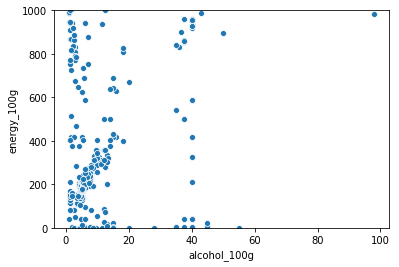

In [53]:
sns.scatterplot(x=tmp.alcohol_100g[tmp.alcohol_100g > 1], y=tmp.energy_100g[tmp.alcohol_100g > 1])
plt.ylim(0, 1000)
plt.show()

## Count the percentage of NA values

In [34]:
def count_na_pct(column, dataframe):
    return dataframe[column].isna().sum() / dataframe.shape[0] * 100 

In [35]:
tmp = [] 
for col in df2.columns:
    na_pct = count_na_pct(col, df2)
    tmp.append(na_pct)
len(tmp) # 143 columns have NA higher than 50%

25

In [36]:
df2_na = pd.DataFrame(data={'percentage': tmp}, index=df2.columns)
df2_na.sort_values(by='percentage', ascending=False, inplace=True)

In [37]:
df2_na.head(10).transpose()

,caffeine_100g,energy-from-fat_100g,cocoa_100g,alcohol_100g,labels_tags,trans-fat_100g,cholesterol_100g,nutrition_grade_fr,nutrition-score-uk_100g,nutrition-score-fr_100g
percentage,99.976057,99.871552,99.452404,98.862274,85.44745,79.726428,79.628824,79.047989,79.047989,79.047989


In [38]:
df2_na.tail(10).transpose()

,sodium_100g,salt_100g,sugars_100g,carbohydrates_100g,fat_100g,proteins_100g,energy_100g,product_name,countries_tags,code
percentage,18.054599,18.04967,17.338556,15.852949,15.816189,15.277044,15.068456,3.760495,0.082815,0.004789


## drop attributes that shouldn't have NA
+ i.e. if the basic nutrients have NA, drop the data
+ sodium_100g, salt_100g, sugars_100g, fat_100g, proteins_100g, energy_100g, product_name, code

In [39]:
to_drop = ['sodium_100g', 'salt_100g', 'sugars_100g', 'fat_100g', 'proteins_100g', 'energy_100g', 'product_name', 'code']

In [40]:
notna = set(df2.index.values)
for col in to_drop: 
    notna.intersection_update(set(df2.index[df2[col].notna()]))
len(notna)

560536

In [41]:
df3 = df2.iloc[list(notna), :]

In [42]:
tmp = [] 
for col in df3.columns:
    na_pct = count_na_pct(col, df3)
    tmp.append(na_pct)

df3_na = pd.DataFrame(data={'percentage': tmp}, index=df3.columns)
df3_na.sort_values(by='percentage', ascending=False, inplace=True)

df3_na.tail(10).transpose()

,carbohydrates_100g,countries_tags,code,salt_100g,product_name,sugars_100g,proteins_100g,fat_100g,energy_100g,sodium_100g
percentage,0.058872,0.019089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df3.shape

(560536, 25)

In [44]:
import numpy as np 
from sklearn.cluster import KMeans

In [45]:
km = KMeans(n_clusters=5)
km.fit(df3.loc[: , ['energy_100g', 'fat_100g', 'proteins_100g', 'sugars_100g', 'sodium_100g', 'salt_100g']])
np.bincount(km.labels_)

array([560507,      1,      3,      3,     22], dtype=int64)

## detect outliers in the dataset

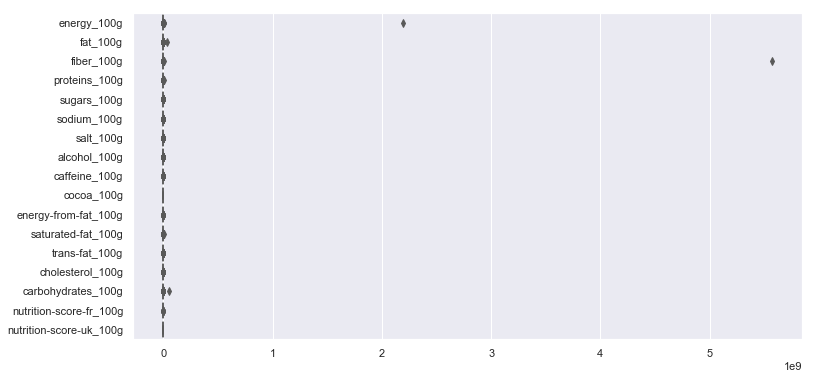

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3.drop(['code', 'additives_n'], axis=1), orient='h', palette="Set2")
plt.show()

### remove outliers with more than 10000 values
+ apply some common sense
    + for energy, it's likely to be a few thousand kilojoul, but not more than 10000
    + for others, it should be less than 100, since it's out of 100 gram of the product

energy_100g and fiber_100g

In [47]:
df3 = df2.iloc[list(notna), :]
df3.reset_index(inplace=True, drop=True)

In [48]:
# energy greater than 10000
out_energy = df3[(df3.energy_100g > 10000) | (df3.energy_100g < 0)].index.values
tmp = set(out_energy)
len(tmp)

100

In [49]:
# get indexes other attributes if value >= 100
not_na_cols = ['energy_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'energy-from-fat_100g']
for col in df3.drop(not_na_cols, axis=1).columns:
    if df3[col].dtype == 'float64' : 
        tmp.update(set(df3.index[(df3[col] > 100.0) | (df3[col] < 0.0)])) 
        # this does not include NA
        # but nutrition-score-fr_100g and nutrition-score-uk_100g can be < 0
        # tmp = tmp.union() # it's the same!
len(tmp)

601

In [50]:
df3 = df3.drop(tmp, axis=0)
df3.shape

(559935, 25)

In [51]:
df3['nutrition_grade_fr'].value_counts()

d    42940
e    32343
c    30248
b    20638
a    20187
Name: nutrition_grade_fr, dtype: int64

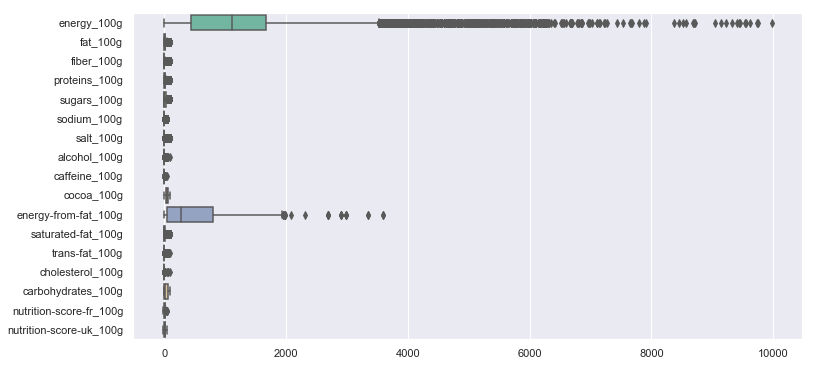

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3.drop(['code', 'additives_n'], axis=1), orient='h', palette="Set2")
plt.show()

### convert eneregy_100g from kJ to kcal
1 kcal = 4.184 kJ, i.e. kcal = kJ / 4.184

In [53]:
df3.energy_100g = df3.energy_100g.apply(lambda kj: round(kj / 4.184))
df3['energy-from-fat_100g'][df3['energy-from-fat_100g'].notna()] = \
    df3['energy-from-fat_100g'][df3['energy-from-fat_100g'].notna()].apply(lambda kj: round(kj / 4.184))

C:\Users\davilaYuan\Miniconda3\envs\sklearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


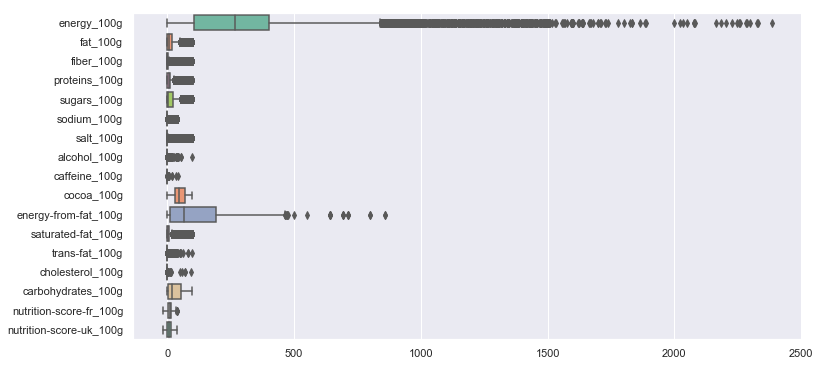

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3.drop(['code', 'additives_n'], axis=1), orient='h', palette="Set2")
plt.show()

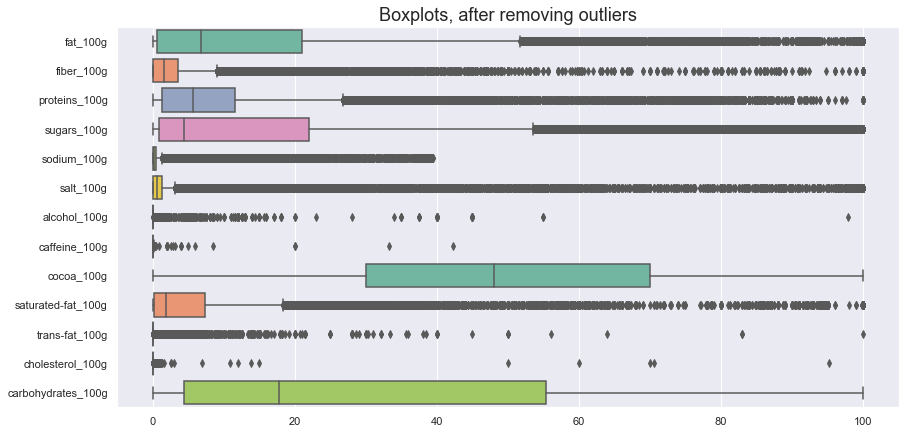

In [59]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df3.drop(['code', 'additives_n', 'energy_100g', 'energy-from-fat_100g', \
                           'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], axis=1), \
            orient='h', palette="Set2") #, showfliers=False)
plt.title('Boxplots, after removing outliers', fontdict={'fontsize': 18})
plt.savefig('fig05_remove_outliers.png', bbox_inches='tight', dpi=300)
plt.show()

### inspection on product names

In [35]:
def inspect_outliers(column, value=90):
    tmp = df3.index[df3[column] > value]
    return df.iloc[tmp, :].loc[:, ['code', column, 'product_name', 'categories_tags']]

In [36]:
# it's possible that fat is high, since it's oil products
tmp = inspect_outliers('fat_100g')
tmp.tail()

,code,fat_100g,product_name,categories_tags
560095,5060309490679,24.0,Vanilla cookie,NaN
560277,5060336505841,1.4,Burger Relish Caramel Red Onion,NaN
560278,5060336507142,NaN,Branson original pickle,NaN
560461,5060343749139,62.0,"Roasted Hazelnut Butter, Dark Chocolate",NaN
560466,5060343749535,0.5,Liquid egg whites,"en:dietary-supplements,fr:blancs-d-oeufs,fr:bl..."


In [37]:
# it's possible 
tmp = inspect_outliers('fiber_100g')
tmp.tail()

,code,fiber_100g,product_name,categories_tags
528016,42286578,NaN,Chari Tea,NaN
532495,4305615462868,NaN,Apfelringe,"en:plant-based-foods-and-beverages,en:plant-ba..."
533175,4311501456361,NaN,Joghurt,"en:dairies,en:fermented-foods,en:fermented-mil..."
533414,4311501601983,10.4,schweizer Edelzartbitter Schokolade 72% Kakao,NaN
545619,5000183093023,1.7,Luxury Cookies Golden,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc..."


In [38]:
# it's possible 
tmp = inspect_outliers('proteins_100g')
tmp.tail()

,code,proteins_100g,product_name,categories_tags
536036,4388844003651,NaN,Tomaten Paprika,NaN
536037,4388844003972,4.5,Gnocchi,"en:plant-based-foods-and-beverages,en:plant-ba..."
536054,4388844005112,12.0,Original Frankfurter Würstchen,"en:meats,en:prepared-meats,en:sausages,en:germ..."
536056,4388844005259,NaN,Apfelrotkohl Rewe,NaN
536066,4388844006867,5.9,Schokoröllchen Mit Feiner Schokolade,NaN


## Explore with KMeans

In [39]:
import numpy as np 
from sklearn.cluster import KMeans

In [40]:
tmp = df3.loc[: ,df3.columns[(df3.dtypes == 'float64') | (df3.dtypes == 'int64')]]
tmp.shape

(559935, 18)

In [41]:
for col in tmp.columns:
    na_pct = count_na_pct(col, tmp)
    print('Column:', col, '\tNA Percentage', na_pct)

Column: additives_n 	NA Percentage 36.25920865814783
Column: energy_100g 	NA Percentage 0.0
Column: fat_100g 	NA Percentage 0.0
Column: fiber_100g 	NA Percentage 52.682007733040436
Column: proteins_100g 	NA Percentage 0.0
Column: sugars_100g 	NA Percentage 0.0
Column: sodium_100g 	NA Percentage 0.0
Column: salt_100g 	NA Percentage 0.0
Column: alcohol_100g 	NA Percentage 99.36528347040282
Column: caffeine_100g 	NA Percentage 99.97303258413923
Column: cocoa_100g 	NA Percentage 99.3426022663345
Column: energy-from-fat_100g 	NA Percentage 99.85301865395091
Column: saturated-fat_100g 	NA Percentage 3.6904283532910074
Column: trans-fat_100g 	NA Percentage 75.38017805638154
Column: cholesterol_100g 	NA Percentage 75.26034271835124
Column: carbohydrates_100g 	NA Percentage 0.05714949056586925
Column: nutrition-score-fr_100g 	NA Percentage 73.86196612106762
Column: nutrition-score-uk_100g 	NA Percentage 73.86196612106762


In [42]:
# on attributes without NA
km = KMeans(n_clusters=5)
km.fit(tmp.loc[: , ['energy_100g', 'fat_100g', 'proteins_100g', 'sugars_100g', 'sodium_100g', 'salt_100g']])
np.bincount(km.labels_)

array([ 92882, 175441, 126851,  10148, 154613], dtype=int64)

In [43]:
# cluster on rows with grade rankings
row_idx = df3.index[df3.nutrition_grade_fr.notna()]
tmp = df3.loc[row_idx ,df3.columns[(df3.dtypes == 'float64') | (df3.dtypes == 'int64')]]
tmp.shape

(146356, 18)

In [44]:
km = KMeans(n_clusters=5)
km.fit(tmp.loc[: , ['energy_100g', 'fat_100g', 'proteins_100g', 'sugars_100g', 'sodium_100g', 'salt_100g']])
np.bincount(km.labels_)

array([ 4234, 51159, 33236, 24132, 33595], dtype=int64)

In [45]:
df3['nutrition_grade_fr'].value_counts()

d    42940
e    32343
c    30248
b    20638
a    20187
Name: nutrition_grade_fr, dtype: int64

In [46]:
df3.shape

(559935, 25)

In [47]:
df3.to_csv(os.path.join(data_path, 'openfoodfacts_processed.gz'), compression='gzip', index=False)
# 20392kb, saved with extension gz
# this is saved at the path specified, as 'openfoodfacts_processed.gz' contains 'openfoodfacts_processed'